In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
def load_image(loc):
    return cv.imread(loc, cv.IMREAD_GRAYSCALE)

In [3]:
def image_preprocess(img):
    blurred = cv.GaussianBlur(img, (5,5), 0)
    edges = cv.Canny(blurred, 50, 125)
    blur = cv.GaussianBlur(edges, (5,5), 0)
    return blur

In [4]:
def plot_image(img):
    plt.imshow(img, cmap="gray")
    plt.title("Detected Edges")
    plt.show()

In [5]:
def detect_edges(img):
    loadimg = load_image(img)
    imageprocess = image_preprocess(loadimg)
    plot_image(imageprocess)

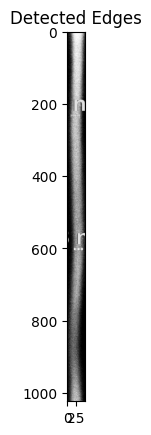

In [6]:
plot_image(load_image("../Images/sample 5.png"))

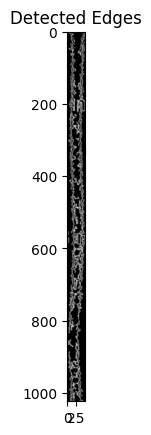

In [7]:
detect_edges("../Images/sample 5.png")

In [8]:
image = image_preprocess(load_image("../Images/sample 5.png"))
image

array([[ 0,  0,  0, ...,  0,  0,  0],
       [16, 15, 11, ...,  0,  0,  0],
       [66, 65, 55, ...,  1,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], shape=(1024, 50), dtype=uint8)

In [9]:
for i in image:
    print(i)
    break

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2 10 22 28 22 12 12
 20 20 10  2  0  2 10 20 20 12 10 12  8  2  0  0  0  0  0  0  0  0  0  0
  0  0]


In [10]:
height, width = image.shape

left_edge = []
right_edge = []

for y in range(height):
    row = np.where(image[y, :] > 0)[0]
    
    if len(row) > 0:
        left_edge.append([y, row[0]]) 
        right_edge.append([y, row[-1]])


left_edge = np.array(left_edge)
right_edge = np.array(right_edge)

In [11]:
print(right_edge[100] - left_edge[100])
print(right_edge[200] - left_edge[200])
print(right_edge[300] - left_edge[300])
print(right_edge[400] - left_edge[400])
print(right_edge[500] - left_edge[500])
print(right_edge[600] - left_edge[600])
print(right_edge[700] - left_edge[700])
print(right_edge[800] - left_edge[800])
print(right_edge[1000] - left_edge[1000])


[ 0 34]
[ 0 45]
[ 0 35]
[ 0 34]
[ 0 35]
[ 0 27]
[ 0 27]
[ 0 30]
[ 0 35]


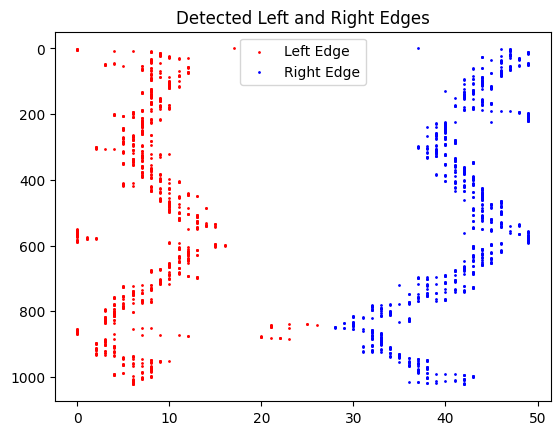

In [12]:
plt.scatter(left_edge[:, 1], left_edge[:, 0], c="red", s=1, label="Left Edge")
plt.scatter(right_edge[:, 1], right_edge[:, 0], c="blue", s=1, label="Right Edge")
plt.gca().invert_yaxis()
plt.legend()
plt.title("Detected Left and Right Edges")
plt.show()

In [13]:
mean_left_edge = np.mean(right_edge[:, 1])

ler = np.std(right_edge[:, 1])

print(f"LER: {ler:.4f} pixels")

LER: 4.9233 pixels


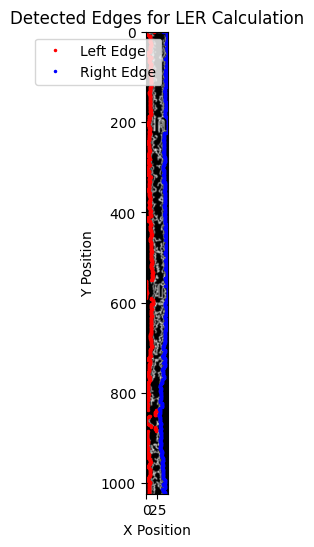

In [14]:
plt.figure(figsize=(8, 6))
plt.imshow(image, cmap='gray')
plt.plot( left_edge[:, 1],left_edge[:, 0], 'r.', markersize=3, label="Left Edge")
plt.plot(right_edge[:, 1],right_edge[:, 0],  'b.', markersize=3, label="Right Edge")
plt.legend()
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.title("Detected Edges for LER Calculation")
plt.show()